In [22]:
# task 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("DS2_C6_S4_CarSales_Data_Challenge.csv")
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
df.shape

(157, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
__year_resale_value,121.0,18.072975,11.453384,5.160000,11.260000,14.180000,19.875000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,18.017500,22.799000,31.947500,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,2.300000,3.000000,3.575000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,149.500000,177.500000,215.000000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,103.000000,107.000000,112.200000,138.700000
Width,156.0,71.150000,3.451872,62.600000,68.400000,70.550000,73.425000,79.900000
Length,156.0,187.343590,13.431754,149.400000,177.575000,187.900000,196.125000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.971000,3.342000,3.799500,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,15.800000,17.200000,19.575000,32.000000


In [6]:
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [7]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [8]:
df.drop(columns=['__year_resale_value'], inplace = True)

In [9]:
df.dropna(inplace = True)

In [10]:
df.corr()

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.301850,0.027716,-0.192519,0.360186,0.143664,0.260162,0.008784,0.087437,-0.016474,-0.220031
Price_in_thousands,-0.301850,1.000000,0.623545,0.841062,0.108494,0.328493,0.154924,0.527148,0.423980,-0.491391,0.898948
Engine_size,0.027716,0.623545,1.000000,0.836649,0.472586,0.692124,0.542036,0.760908,0.666948,-0.737267,0.816362
Horsepower,-0.192519,0.841062,0.836649,1.000000,0.282166,0.534726,0.384787,0.610549,0.505455,-0.616075,0.993012
Wheelbase,0.360186,0.108494,0.472586,0.282166,1.000000,0.681205,0.840137,0.651443,0.656815,-0.497305,0.254308
Width,0.143664,0.328493,0.692124,0.534726,0.681205,1.000000,0.705746,0.723284,0.663125,-0.602309,0.506867
Length,0.260162,0.154924,0.542036,0.384787,0.840137,0.705746,1.000000,0.629261,0.570932,-0.447442,0.347225
Curb_weight,0.008784,0.527148,0.760908,0.610549,0.651443,0.723284,0.629261,1.000000,0.864891,-0.819622,0.612011
Fuel_capacity,0.087437,0.423980,0.666948,0.505455,0.656815,0.663125,0.570932,0.864891,1.000000,-0.801783,0.504323
Fuel_efficiency,-0.016474,-0.491391,-0.737267,-0.616075,-0.497305,-0.602309,-0.447442,-0.819622,-0.801783,1.000000,-0.608267


<AxesSubplot:>

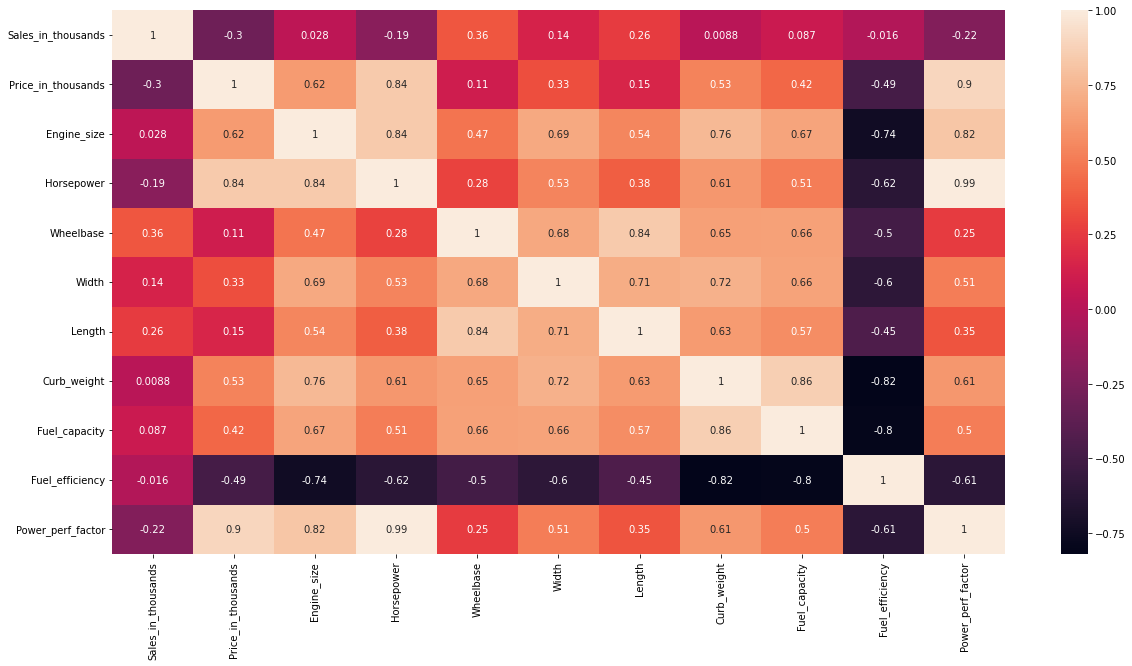

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot = True)

In [12]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [13]:
df

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0,78,16.919,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,47,58.280150
1,0,139,39.384,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91,91.370778
3,0,112,8.588,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,52,91.389779
4,1,8,20.397,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,20,62.777639
5,1,9,18.780,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,116,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,29,143,3.545,1,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,121,66.498812
153,29,122,15.245,1,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,26,70.654495
154,29,144,17.531,1,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,87,71.155978
155,29,24,3.493,1,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,71,101.623357


In [14]:
df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns = df.columns)
df

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0.000000,0.520000,0.031102,1.0,0.160821,0.114286,0.215190,0.186551,0.271676,0.306258,0.202339,0.133641,0.433333,0.373016,0.212314
1,0.000000,0.926667,0.072669,1.0,0.251295,0.314286,0.430380,0.336226,0.445087,0.579228,0.441120,0.317972,0.333333,0.722222,0.413024
2,0.000000,0.746667,0.015687,1.0,0.429620,0.357143,0.392405,0.477223,0.508671,0.628495,0.531683,0.354839,0.233333,0.412698,0.413140
3,0.034483,0.053333,0.037537,1.0,0.193470,0.114286,0.240506,0.216920,0.323699,0.380826,0.299973,0.281106,0.400000,0.158730,0.239594
4,0.034483,0.060000,0.034545,1.0,0.324067,0.257143,0.367089,0.349241,0.780347,0.567244,0.453087,0.377880,0.233333,0.920635,0.371745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,1.000000,0.953333,0.006356,1.0,0.198846,0.128571,0.265823,0.171367,0.289017,0.362184,0.311939,0.253456,0.333333,0.960317,0.262164
148,1.000000,0.813333,0.028004,1.0,0.239494,0.200000,0.286076,0.266811,0.387283,0.486019,0.357085,0.350230,0.333333,0.206349,0.287371
149,1.000000,0.960000,0.032234,1.0,0.256540,0.200000,0.286076,0.266811,0.387283,0.490013,0.370955,0.350230,0.333333,0.690476,0.290412
150,1.000000,0.160000,0.006260,1.0,0.475513,0.185714,0.458228,0.266811,0.514451,0.483356,0.463965,0.377880,0.266667,0.563492,0.475211


In [15]:
# task 2

dbscan = DBSCAN(eps = 0.35 , min_samples = 11)
dbscan.fit(df[['Width' , 'Length']])

DBSCAN(eps=0.35, min_samples=11)

In [16]:
df['task_2_cluster_labels'] = dbscan.labels_

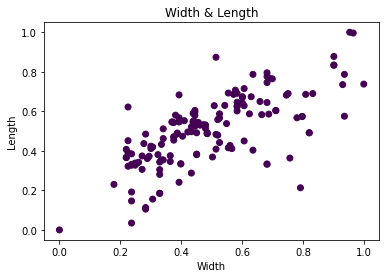

In [17]:
plt.scatter(df['Width'] , df['Length'] , c = df['task_2_cluster_labels'] )
plt.title('Width & Length')
plt.xlabel('Width')
plt.ylabel('Length');

Text(0, 0.5, 'Epsilon')

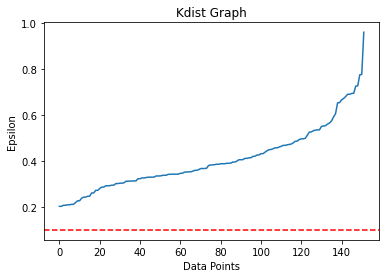

In [18]:
# task 3

from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(df)
distances,index=nbrs.kneighbors(df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=0.10, color='r', linestyle='--')
plt.title('Kdist Graph')
plt.xlabel('Data Points')
plt.ylabel('Epsilon')

In [19]:
eps = 0.45
for i in range(2,10):
    model = DBSCAN(eps = eps , min_samples = i)
    cluster_labels = model.fit_predict(df)
    x = cluster_labels + 2
    y = np.bincount(x)
    z = np.nonzero(y)[0]
    results = list(zip(z , y[z]))
    print(f'eps : {eps}, min_samples : {i}, Obtained Clusters : {results}' )

eps : 0.45, min_samples : 2, Obtained Clusters : [(1, 47), (2, 86), (3, 2), (4, 15), (5, 2)]
eps : 0.45, min_samples : 3, Obtained Clusters : [(1, 51), (2, 86), (3, 15)]
eps : 0.45, min_samples : 4, Obtained Clusters : [(1, 59), (2, 81), (3, 12)]
eps : 0.45, min_samples : 5, Obtained Clusters : [(1, 67), (2, 74), (3, 11)]
eps : 0.45, min_samples : 6, Obtained Clusters : [(1, 75), (2, 66), (3, 11)]
eps : 0.45, min_samples : 7, Obtained Clusters : [(1, 90), (2, 54), (3, 8)]
eps : 0.45, min_samples : 8, Obtained Clusters : [(1, 108), (2, 44)]
eps : 0.45, min_samples : 9, Obtained Clusters : [(1, 110), (2, 13), (3, 29)]


Silhouette Coefficient =  0.19071665773028498


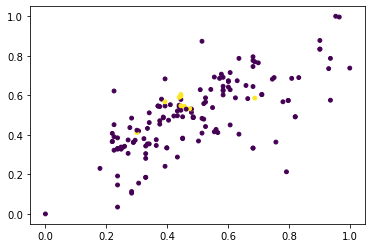

In [25]:
# with tuning

dbscan_opt=DBSCAN(eps=0.45,min_samples=11)
dbscan_opt.fit(df)

df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

plt.scatter(df['Width'],df['Length'], c=df['DBSCAN_opt_labels'],s=15)
print("Silhouette Coefficient = ",metrics.silhouette_score(df, df['DBSCAN_opt_labels']))